# Check that Optical Density is Calculated Correctly

In [1]:
import mne
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
from itertools import compress
import os
import mne.externals.pymatreader


In [2]:
plt.rcParams["figure.figsize"] = (12,4)
# %matplotlib qt

## MATLAB
This is the exact code run to produce the MATLAB data

```matlab
addpath(genpath('nirs-toolbox'))
raw = nirs.io.loadNIRx('/home/rluke/Documents/Data/2019-NHMRC/Pilot0/2019-10-03_001', false);
pipeline = nirs.modules.OpticalDensity();
OD_data = pipeline.run(raw);
OD_data.probe.link(1, :) 
% source    detector    type    ShortSeperation
% ______    ________    ____    _______________
%
%   1          1        760          false   
data = OD_data.data(:, 1);
save('od_test.mat', 'data')
```

In [3]:
matlab_data = mne.externals.pymatreader.read_mat('od_test.mat')['data']

## Python

In [4]:
raw = mne.io.read_raw_nirx('recording', preload=True); 
raw = mne.preprocessing.optical_density(raw)

Loading recording
Reading 0 ... 11753  =      0.000 ...  1880.480 secs...


In [5]:
raw.info['chs'][0]['ch_name']

'S1-D1 760'

Text(0, 0.5, 'Optical Density')

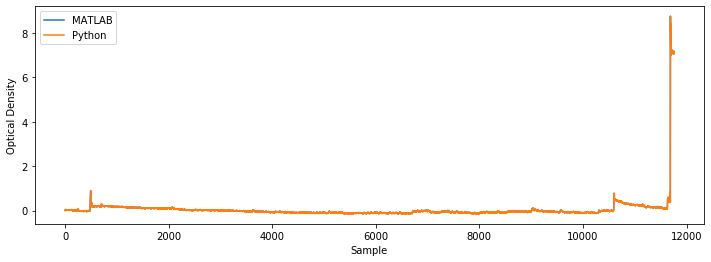

In [6]:
plt.plot(matlab_data, label='MATLAB')
plt.plot(raw.get_data()[0], label='Python')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Optical Density')

Text(0, 0.5, 'MATLAB - Python')

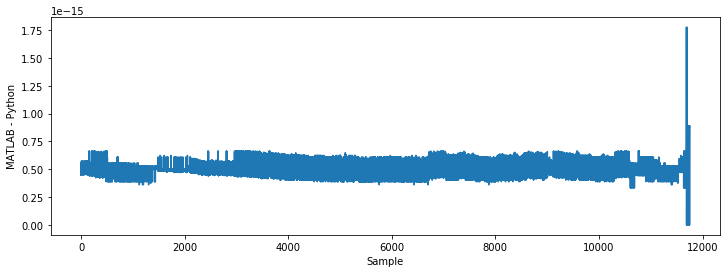

In [7]:
plt.plot(matlab_data - raw.get_data()[0], label='MATLAB')
plt.xlabel('Sample')
plt.ylabel('MATLAB - Python')